In [19]:
import os
working_dir = '/Users/hudsonchen/research/fx_bayesian_quaduature/CBQ/results_server/sensitivity_conjugate/'
os.chdir(working_dir)

In [2]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy
from scipy import stats

plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rc('text', usetex=False)
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts}')
plt.tight_layout()


<Figure size 432x288 with 0 Axes>

In [3]:
import shutil

dirs = []
for d in os.listdir():
    if '__complete' in d:
        dirs.append(d)
    else:
        try:
            shutil.rmtree(d)
        except:
            pass
        
        
print(dirs)


['seed_7__dim_10__complete', 'seed_3__dim_8__complete', 'seed_2__dim_10__complete', 'seed_8__dim_8__complete', 'seed_6__dim_10__complete', 'seed_3__dim_10__complete', 'seed_7__dim_8__complete', 'seed_5__dim_10__complete', 'seed_2__dim_8__complete', 'seed_0__dim_10__complete', 'seed_9__dim_8__complete', 'seed_4__dim_10__complete', 'seed_1__dim_10__complete', 'seed_6__dim_8__complete', 'seed_8__dim_10__complete', 'seed_1__dim_8__complete', 'seed_5__dim_8__complete', 'seed_9__dim_10__complete', 'seed_0__dim_8__complete', 'seed_4__dim_8__complete']


In [13]:

dir_num = len(dirs)

# N_alpha_array = jnp.array([5])
Nx_array = jnp.concatenate((jnp.array([5]), jnp.arange(5, 110, 10)))
# N_theta_array = jnp.array([30])
Ny_array = jnp.arange(5, 105, 5)

dim_all = jnp.array([8, 10])
seed_num = 10

confidence_level = jnp.arange(0.0, 1.01, 0.05)




10


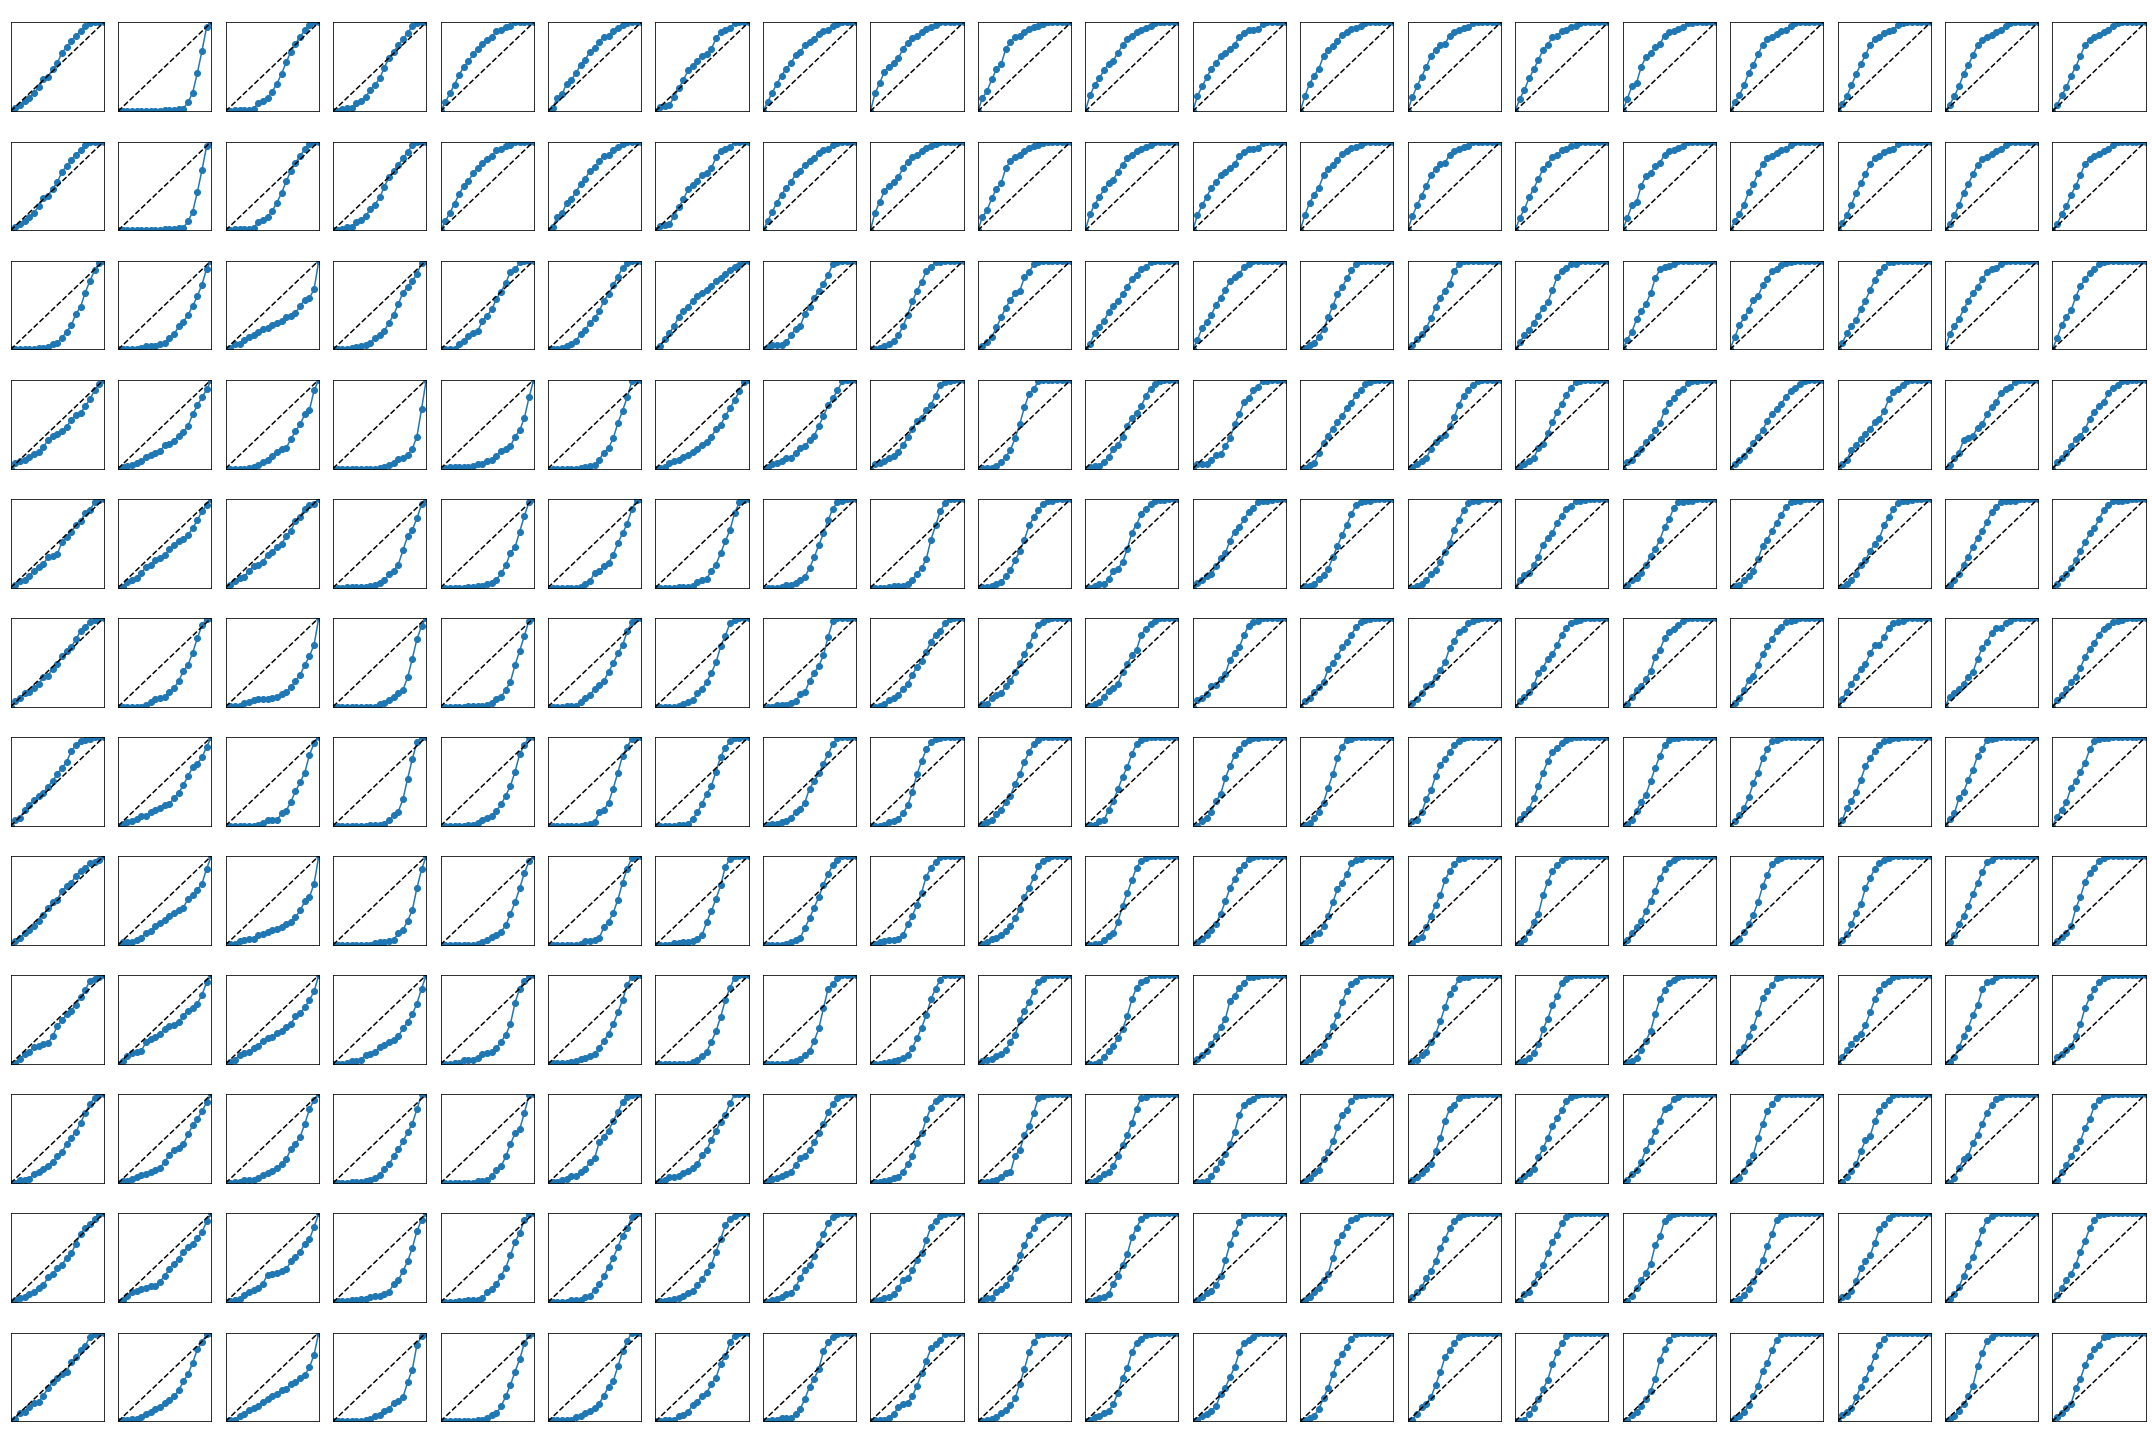

In [18]:

dim = 10

dir_temp = []
for filename in dirs:
    if f'dim_{dim}' in filename:
        dir_temp.append(filename)
dir_num_temp = len(dir_temp)
print(dim)

fig, axs = plt.subplots(len(Nx_array), len(Ny_array), figsize=(30, 20))

for i, Nx in enumerate(Nx_array):
    for j, Ny in enumerate(Ny_array):
        calibration_ = 0 * confidence_level

        for d in dir_temp:
            calibration = np.load(f"{d}/calibration_X_{Nx}_y_{Ny}.npy")
            calibration_ += calibration
        calibration_ /= len(dir_temp)

        axs[i,j].plot(confidence_level, calibration, label="Model calibration", marker="o")
        axs[i,j].plot([0, 1], [0, 1], linestyle="--", label="Ideal calibration", color="black")
        # axs[i,j].set_xlabel("Confidence")
        # axs[i,j].set_ylabel("Coverage")
        title = axs[i,j].set_title(f"Nx {Nx} Ny {Ny}")
        title.set_color('white')
        # axs[i,j].legend()
        axs[i,j].set_xlim(0, 1)
        axs[i,j].set_ylim(0, 1)
        axs[i,j].set_xlabel('')
        axs[i,j].set_ylabel('')

        # turn off x and y ticks
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        
plt.tight_layout()
plt.show()

In [ ]:

dim = 8

dir_temp = []
for filename in dirs:
    if f'dim_{dim}' in filename:
        dir_temp.append(filename)
dir_num_temp = len(dir_temp)
print(dim)

fig, axs = plt.subplots(len(Nx_array), len(Ny_array), figsize=(30, 10))

for i, Nx in enumerate(Nx_array):
    for j, Ny in enumerate(Ny_array):
        calibration_ = 0 * confidence_level

        for d in dir_temp:
            calibration = np.load(f"{d}/calibration_X_{Nx}_y_{Ny}.npy")
            calibration_ += calibration
        calibration_ /= len(dir_temp)

        axs[i,j].plot(confidence_level, calibration, label="Model calibration", marker="o")
        axs[i,j].plot([0, 1], [0, 1], linestyle="--", label="Ideal calibration", color="black")
        # axs[i,j].set_xlabel("Confidence")
        # axs[i,j].set_ylabel("Coverage")
        axs[i,j].set_title(f"Nx {Nx} and Ny {Ny}")
        # axs[i,j].legend()
        axs[i,j].set_xlim(0, 1)
        axs[i,j].set_ylim(0, 1)
        
plt.tight_layout()
plt.show()